In [1]:
import typing

import rich
from rich.progress import track

import pandas
import transformers
import evaluate

import cltrier_lib

In [2]:
pandas.set_option('display.max_colwidth', None)

In [3]:
RAW_DATASET: str = "../data/interim/twitter.german.dataset.enriched.csv"
TEST_SIZE: int = 50

MODELS: typing.Dict[str, str] = {
    "base": "meta-llama/Llama-3.2-3B-Instruct", 
    "adapter": "simon-muenker/Llama-3.2-3B-Instruct-OSN-posts"
}

In [4]:
pipelines: typing.Dict[str, transformers.Pipeline] = {
    label: transformers.pipeline("text-generation", slug, device=f"cuda:{1}")
    for n, (label, slug) in enumerate(MODELS.items())
}

pipelines["adapter"].model.load_adapter(MODELS["adapter"])

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:1


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:1


In [5]:
dataset: typing.List[cltrier_lib.inference.schemas.Chat] = [
    cltrier_lib.inference.schemas.Chat(messages=[
        cltrier_lib.inference.schemas.Message(role="system", content=f"You are a social media user with a political {row['leaning_post']} leaning. Post a Tweet about the following topic:"),
        cltrier_lib.inference.schemas.Message(role="user", content=row["topics_post"]),
        cltrier_lib.inference.schemas.Message(role="assistant", content=row["text_post"])
    ])
    for _, row in pandas.read_csv(RAW_DATASET, index_col=0).iterrows()
]
dataset[:3]

[Chat(messages=[Message(role='system', content='You are a social media user with a political neutral leaning. Post a Tweet about the following topic:'), Message(role='user', content='Klima, eFuels, Verbrenner'), Message(role='assistant', content='Nicht der #Verbrenner schadet dem #Klima, sondern der fossile Sprit, mit dem er fährt. Wir haben diese Woche den Weg für klimaneutrale #eFuels freigemacht. Damit könnten die mehr als 45 Mio. Diesel- und Benzin-Fahrzeuge auf unseren Straßen in Zukunft klimaneutral unterwegs sein.')]),
 Chat(messages=[Message(role='system', content='You are a social media user with a political right leaning. Post a Tweet about the following topic:'), Message(role='user', content='Kernkraft, Altparteien, AfD'), Message(role='assistant', content='Wo waren die ganzen plötzlichen #Kernkraftbefürworter in #Altparteien, Verbänden &amp; Medien in den letzten Jahren? Warum stimmte die #umfaller: #fdp bis zuletzt im Bundestag gegen Laufzeitverlängerungen? Fakt ist: nur d

In [6]:
responses = []

for idx, chat in enumerate(track(dataset[:TEST_SIZE])):
    responses.append(
        dict(
            id=idx,
            model="human",
            reply=chat[-1].content
        )
    )

    for model, pipeline in pipelines.items():
        reply = pipeline(
            pipeline.tokenizer.apply_chat_template(chat[:-1], tokenize=False), 
            max_new_tokens=128,
            return_full_text=False
        )[0]["generated_text"].split("\n\n")[1]

        responses.append(
            dict(
                id=idx,
                model=model,
                reply=reply
            )
        )

Output()

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [7]:
predictions: pandas.DataFrame = (
    pandas.DataFrame(responses)
    .set_index("id")
    .pivot(columns=["model"])
)
predictions.head().style.set_properties(**{'text-align': 'left'})

In [8]:
scores_base = evaluate.load("bleu").compute(
    references=predictions[("reply", "human")].tolist(),
    predictions=predictions[("reply", "base")].tolist(),
    smooth=True
)
rich.print(scores_base)

{
    'bleu': 0.004295533011426501,
    'precisions': [0.15254237288135594, 0.012355848434925865, 0.00042052144659377626, 0.000429553264604811],
    'brevity_penalty': 1.0,
    'length_ratio': 1.2484879032258065,
    'translation_length': 2477,
    'reference_length': 1984
}

In [9]:
scores_adapter = evaluate.load("bleu").compute(
    references=predictions[("reply", "human")].tolist(),
    predictions=predictions[("reply", "adapter")].tolist(),
    smooth=True
)
rich.print(scores_adapter)

{
    'bleu': 0.01946525268913204,
    'precisions': [0.22553973357831877, 0.035731076633756464, 0.007221954742416947, 0.00246669955599408],
    'brevity_penalty': 1.0,
    'length_ratio': 1.096774193548387,
    'translation_length': 2176,
    'reference_length': 1984
}

In [10]:
print(
    pandas.DataFrame({
        "prompt": scores_base,
        "fine-tuned": scores_adapter
    }).to_latex()
)

\begin{tabular}{lll}
\toprule
 & prompt & fine-tuned \\
\midrule
bleu & 0.004296 & 0.019465 \\
precisions & [0.15254237288135594, 0.012355848434925865, 0.00042052144659377626, 0.000429553264604811] & [0.22553973357831877, 0.035731076633756464, 0.007221954742416947, 0.00246669955599408] \\
brevity_penalty & 1.000000 & 1.000000 \\
length_ratio & 1.248488 & 1.096774 \\
translation_length & 2477 & 2176 \\
reference_length & 1984 & 1984 \\
\bottomrule
\end{tabular}



In [37]:
import sys
from importlib import reload

sys.path.append('../src')

import tools
reload(tools)


<module 'tools' from '/home/ubuntu/apis/TWON-Agents/notebooks/../src/tools/__init__.py'>

In [53]:
classify_corr = pandas.concat([
    tools.Evaluate()(
        source=predictions[("reply", "human")].tolist(),
        target=predictions[("reply", "base")].tolist()
    )[0].rename("prompt-only"),
    tools.Evaluate()(
        source=predictions[("reply", "human")].tolist(),
        target=predictions[("reply", "adapter")].tolist()
    )[0].rename("fine-tuned")
], axis=1)
classify_corr

,prompt-only,fine-tuned
results.topics.arts_&_culture,0.316324,0.527827
results.topics.business_&_entrepreneurs,0.823855,0.970664
results.topics.celebrity_&_pop_culture,-0.064969,0.183695
results.topics.diaries_&_daily_life,0.268324,0.455055
results.topics.family,0.418441,0.606716
results.topics.fashion_&_style,0.061949,0.604102
results.topics.film_tv_&_video,0.606203,0.367231
results.topics.fitness_&_health,0.822659,0.690324
results.topics.food_&_dining,0.441140,0.710177
results.topics.gaming,0.194686,0.033245


<Axes: >

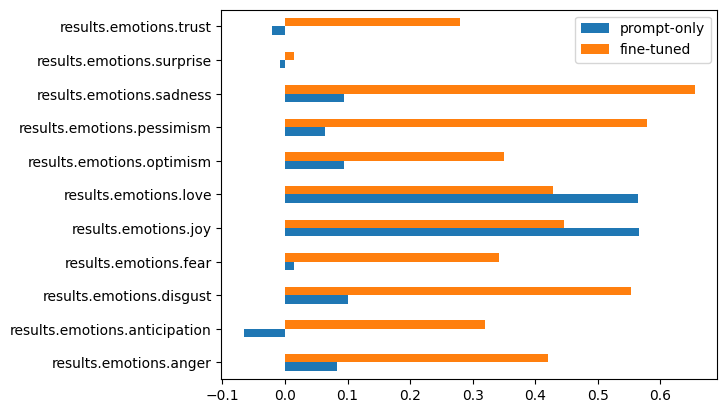

In [54]:
classify_corr[classify_corr.index.str.contains(rf"emotions")].plot(kind="barh")

In [63]:
import torch 
from transformers import AutoTokenizer, AutoModel


tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')
model = AutoModel.from_pretrained('Twitter/twhin-bert-base')

Some weights of BertModel were not initialized from the model checkpoint at Twitter/twhin-bert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [79]:
torch.nn.PairwiseDistance()(
    model(**tokenizer(predictions[("reply", "human")].tolist(), padding=True, return_tensors="pt")).pooler_output,
    model(**tokenizer(predictions[("reply", "base")].tolist(), padding=True, return_tensors="pt")).pooler_output
).mean().item()

3.4211907386779785

In [80]:
torch.nn.PairwiseDistance()(
    model(**tokenizer(predictions[("reply", "human")].tolist(), padding=True, return_tensors="pt")).pooler_output,
    model(**tokenizer(predictions[("reply", "adapter")].tolist(), padding=True, return_tensors="pt")).pooler_output
).mean().item()

1.6079139709472656